In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, re

In [2]:
slst = "../Data/trim.slst"
sta=np.loadtxt(slst,dtype='str')
sta_num=len(sta)
print("number of station: ",sta_num,"\nStation: ",sta)


number of station:  23 
Station:  ['BGU' 'BRPU' 'BSUT' 'CTU' 'CVRU' 'DUG' 'FOR1' 'FORU' 'HMU' 'HWUT' 'JLU'
 'LCMT' 'LIUT' 'MPU' 'NOQ' 'PNSU' 'PSUT' 'RDMU' 'SPU' 'SRU' 'SZCU' 'TCRU'
 'TCU']


In [3]:
usecols=["utvec", "dv", "err", "temp", "SM_EWT", "date"]
root = "../Data/"

file_loc = open("../Data/sta.loc", "r")

for sk in range(sta_num):
    stnm=sta[sk].strip()
    for line in file_loc:
        if re.search(stnm, line):
            loc=line.strip()
            break
    
    fn = root+"INTERP_"+stnm+".csv"
    fi = pd.read_csv(fn,names=usecols,header=0)
    
    fi.drop(columns=['err','date'])
    
    fi.temp = fi.temp - np.mean(fi.temp)
    fi.temp = fi.temp/np.max(np.abs(fi.temp))
    fi.SM_EWT = fi.SM_EWT - np.mean(fi.SM_EWT)
    fi.SM_EWT = fi.SM_EWT/np.max(np.abs(fi.SM_EWT))
    # concatenate data
    if sk == 0:
        fnall=fi
    else:
        fnall=pd.concat([fnall, fi], ignore_index=True)
    
file_loc.close()

# save concatenated data
df=pd.DataFrame({
    'utvec': fnall.utvec,
    'dv':fnall.dv,
    'temp':fnall.temp,
    'SM_EWT':fnall.SM_EWT,
})
df.to_csv('Concat_data.csv')
fnall=fnall.drop(columns=['err','date'])

In [4]:
fnall.head()

,utvec,dv,temp,SM_EWT
0,2007.089722,-0.1144,-0.779977,0.045406
1,2007.092407,-0.1211,-0.778436,0.046900
2,2007.095093,-0.1260,-0.772052,0.048463
3,2007.097900,-0.1276,-0.756125,0.049956
4,2007.100586,-0.1357,-0.742824,0.051519


In [5]:
fnall.describe()

,utvec,dv,temp,SM_EWT
count,92934.000000,92934.000000,9.293400e+04,9.293400e+04
mean,2016.306583,-0.007357,-1.926709e-17,1.474085e-16
std,4.112980,0.242599,5.713370e-01,3.713373e-01
min,2007.002075,-1.105700,-1.000000e+00,-1.000000e+00
25%,2013.211548,-0.147500,-5.285986e-01,-2.610572e-01
50%,2016.896606,-0.004100,-5.706280e-02,-3.431349e-02
75%,2019.738525,0.136400,5.483245e-01,2.428176e-01
max,2022.624268,1.023200,1.000000e+00,1.000000e+00


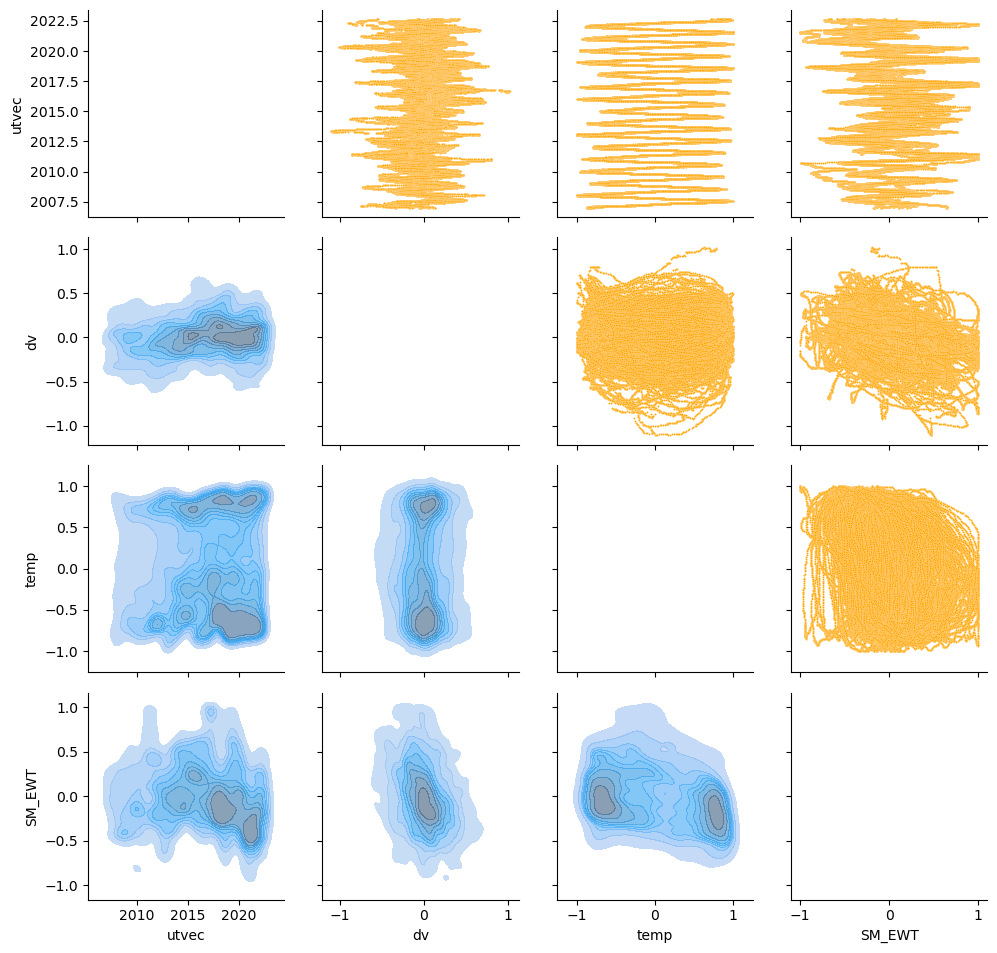

In [8]:
import seaborn as sns
g = sns.PairGrid(fnall)
g.map_upper(sns.scatterplot, s=2, color='orange')
g.map_lower(sns.kdeplot, fill=True, alpha=0.6)
#g.map_diag(sns.histplot, kde=True, bins='auto', data=list(fnall))
g.fig.subplots_adjust(top=0.95)